In [1]:
import os
import sys

import numpy as np
import pandas as pd
import pandas_profiling

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="ticks", color_codes=True)

sys.path.append('../src/features')
import build_features as bf

In [2]:
originalDF = pd.read_csv("../data/raw/application_train.csv")

In [3]:
cleanTrain=bf.executeFeatures(originalDF)

In [4]:
cleanTrain.columns

Index(['TARGET', 'DAYS_BIRTH', 'logAMT_INCOME', 'EDU_Academic degree',
       'EDU_Higher education', 'EDU_Incomplete higher', 'EDU_Lower secondary',
       'EDU_Secondary / secondary special', 'FAM_Civil marriage',
       'FAM_Married', 'FAM_Separated', 'FAM_Single / not married',
       'FAM_Unknown', 'FAM_Widow', 'INC_Businessman',
       'INC_Commercial associate', 'INC_Maternity leave', 'INC_Pensioner',
       'INC_State servant', 'INC_Student', 'INC_Unemployed', 'INC_Working'],
      dtype='object')

## Naive Bayes model build

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

In [6]:
X_train, X_test, y_train, y_test = train_test_split(cleanTrain.iloc[:,1:], 
                                                    cleanTrain.TARGET, test_size = 0.2, random_state = 0)

In [7]:
model = GaussianNB().fit(X_train, y_train)

In [8]:
model.score(X_test, y_test)

0.13253012048192772

## CV 

In [9]:
from sklearn.cross_validation import KFold
from sklearn.metrics import make_scorer, accuracy_score

/home/rob/anaconda3/envs/hcdr/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [10]:
def run_kfold(clf, X_all, y_all):
    kf = KFold(307511, n_folds = 10)
    outcomes = []
    fold = 0
    for train_i, test_i in kf:
        fold += 1
        X_train, X_test = X_all.values[train_i], X_all.values[test_i]
        y_train, y_test = y_all.values[train_i], y_all.values[test_i]
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        outcomes.append(accuracy)
        print("Fold {0} accuracy: {1}".format(fold, accuracy))
    mean_outcome = np.mean(outcomes)
    print("Mean Accuracy: {0}".format(mean_outcome))

In [11]:
run_kfold(model, cleanTrain.iloc[:,1:], cleanTrain.TARGET)

Fold 1 accuracy: 0.13260926118626432
Fold 2 accuracy: 0.13625573152092615
Fold 3 accuracy: 0.13319892036031347
Fold 4 accuracy: 0.13593053884426523
Fold 5 accuracy: 0.1348248837436181
Fold 6 accuracy: 0.13183311111833762
Fold 7 accuracy: 0.13742642515690548
Fold 8 accuracy: 0.11632142044161166
Fold 9 accuracy: 0.13261357354232384
Fold 10 accuracy: 0.12467887223179734
Mean Accuracy: 0.13156927381463634


### Determine ROC

In [12]:
from sklearn.metrics import roc_curve, auc

In [13]:
n_samples, n_features = cleanTrain.iloc[:,1:].shape

In [14]:
predictions = model.predict(X_test)

In [15]:
print(predictions)

[1 1 1 ... 1 1 1]


In [16]:
fpr, tpr, _ = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

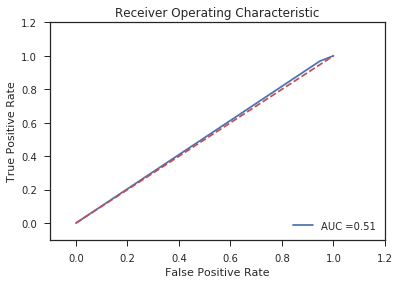

In [17]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC ={:3.2f}'.format(roc_auc))
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()